### Instalamos librerias si no estan en nuestro equipo

In [76]:
!pip install pandas
!pip install numpy
!pip install matplotlib

### Importando librerias a utilizar

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Configuramos ruta del arvhico de FuelSalesDataSample.csv

In [156]:
FILE = "FuelSalesDataSample.csv"

### Cargamos Archivo a DataFrame

In [157]:
data = pd.read_csv(FILE)

### Convertimos las collumnas UnitPrice y TotalSale de tipo money a flotante

In [158]:
data['UnitPrice'] = data['UnitPrice'].replace('[\$,]', '', regex=True).astype(float)

In [159]:
data['TotalSale'] = data['TotalSale'].replace('[\$,]', '', regex=True).astype(float)

In [160]:
data_driveOff = data.copy()

### Filtramos los datos según el tipo de combustible que nos interesa saber (REGULAR)

In [161]:
data_regular = data[data.Grade.eq("REGULAR")]

### Filtramos Perdidas de Drive Off

In [162]:
data_driveOff = data_driveOff[data_driveOff.PaymentType.eq("DRIVE OFF")]

### Agrupamos los datos filtrados por el nombre de la gasolinera para obtener los totales

In [164]:
data_regular = data_regular.groupby(['SiteName'])

In [165]:
data_regular = data_regular['UnitPrice'].mean().to_frame(name = 'UnitPrice').reset_index()

In [167]:
data_driveOff = data_driveOff.drop(columns=['Date', 'Weekday','Hour','SiteID','Grade','Pump','ServiceType','UnitPrice','TotalSale','PaymentType'])

### Graficamos Perdida de Drive Off

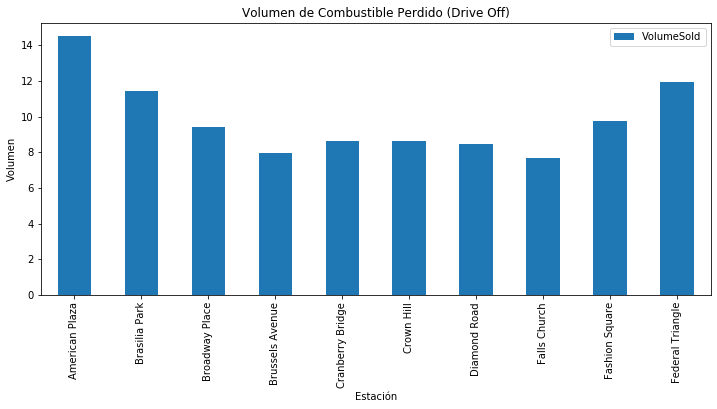

In [169]:
ax = data_driveOff.plot(kind='bar',figsize=(12, 5))
ax.set_title('Volumen de Combustible Perdido (Drive Off)')
ax.set_xlabel('Estación')
ax.set_ylabel('Volumen')
ax.set_xticklabels(data_regular['SiteName'].tolist())

rects = ax.patches

### Se realiza gráfica del promedio del precio combustible por estación 

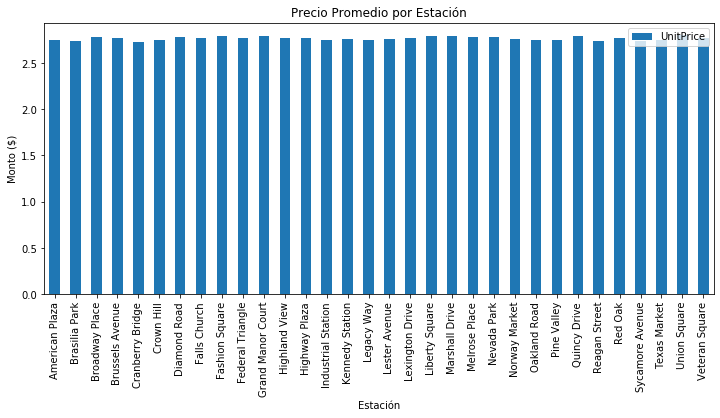

In [170]:
ax = data_regular.plot(kind='bar',figsize=(12, 5))
ax.set_title('Precio Promedio por Estación')
ax.set_xlabel('Estación')
ax.set_ylabel('Monto ($)')
ax.set_xticklabels(data_regular['SiteName'].tolist())

rects = ax.patches